In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [6]:
schools = pd.read_csv(r"c:\Users\Nafisa\Downloads\Schools.csv")
schools

,index,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...,...
370,370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


In [7]:
schools.drop(columns = ['index', "total_SAT"], inplace = True)

In [8]:
schools.isna().sum() # checking for null values
schools.fillna(0, inplace = True) # Filling the null values with 0
schools.duplicated().sum() # checking for duplicate
schools['school_name'].duplicated().sum() # checking for duplicate in the school_name column

np.int64(0)

In [9]:
schools['SAT_scores'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,SAT_scores
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,0.0,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


In [10]:
borough_statistics = schools.groupby('borough')['SAT_scores'].agg(["mean", "median", "std"])
borough_statistics.rename(columns = {"mean" : "SAT_mean", "median" : "SAT_median", "std" : "SAT_std"}, inplace = True)
borough_statistics

,SAT_mean,SAT_median,SAT_std
borough,,,
Bronx,1202.724490,1190.0,150.393901
Brooklyn,1230.256881,1186.0,154.868427
Manhattan,1340.134831,1284.0,230.294140
Queens,1345.478261,1290.0,195.252899
Staten Island,1439.000000,1382.0,222.303596


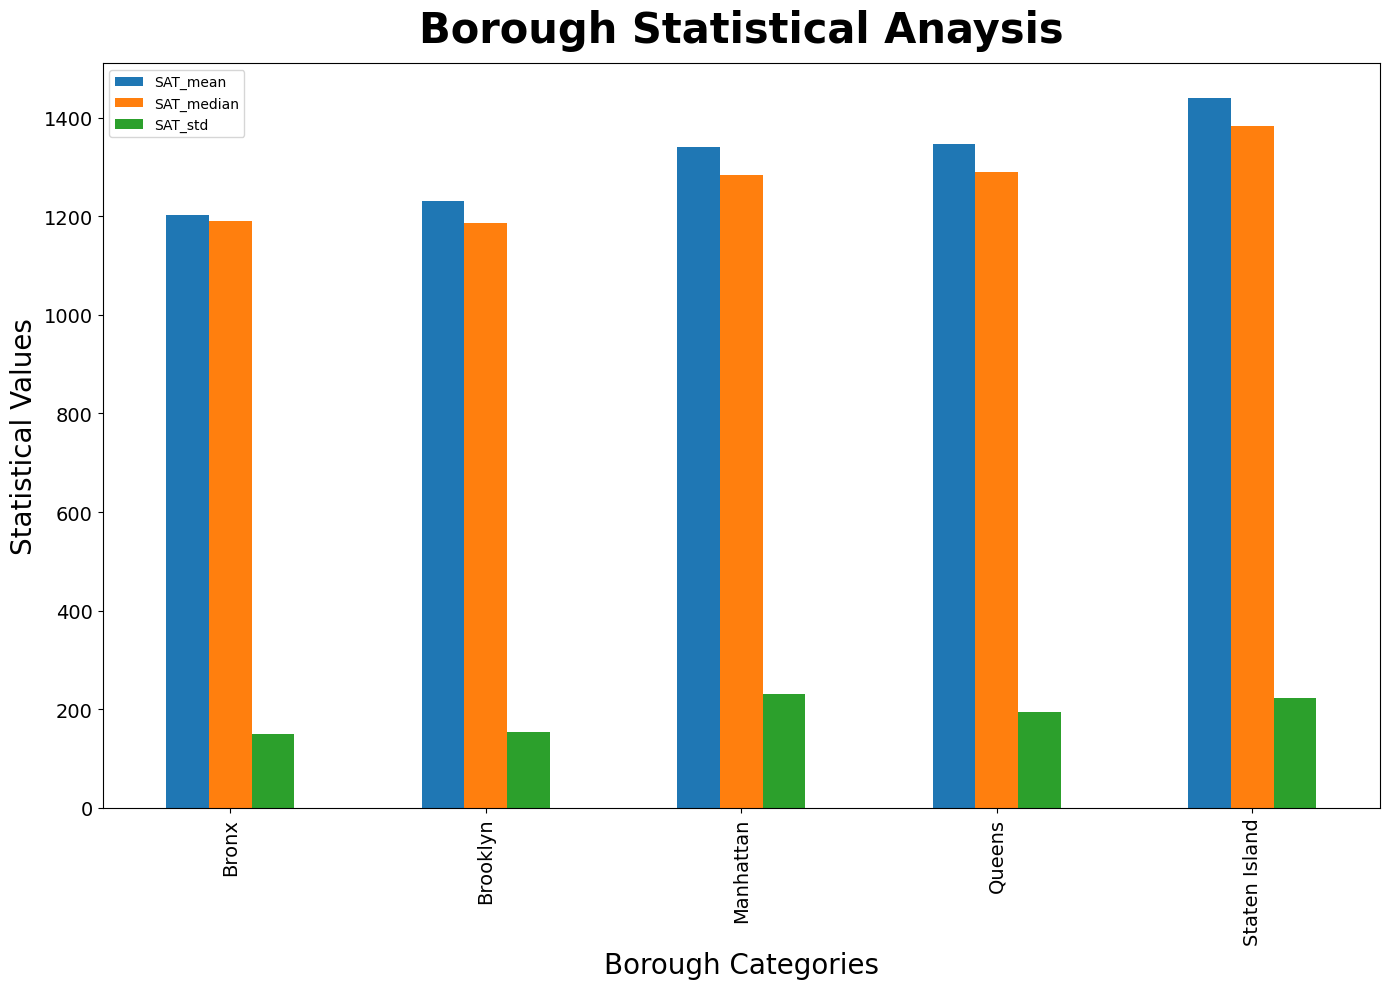

In [11]:
borough_statistics.plot(kind = 'bar', figsize = (14, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Borough Categories", fontsize = 20)
plt.ylabel("Statistical Values", fontsize = 20)
plt.title("Borough Statistical Anaysis", fontsize = 30, fontweight = 'bold', pad = 15)
plt.tight_layout()
plt.savefig("Borough Statistical Anaysis", dpi = 300)

In [12]:
# Top 10 schools with the best average math score
best_math_result = schools[schools['average_math'] >= 600].head(10)
best_math_schools = best_math_result[['school_name', 'average_math']]
best_math_schools

,school_name,average_math
0,"New Explorations into Science, Technology and ...",657
3,High School for Dual Language and Asian Studies,613
5,Bard High School Early College,634
45,Eleanor Roosevelt High School,641
68,"High School for Mathematics, Science, and Engi...",683
88,Stuyvesant High School,754
93,Staten Island Technical High School,711
170,Bronx High School of Science,714
174,High School of American Studies at Lehman College,669
204,Bard High School Early College Queens,631


In [13]:
np_corr = np.corrcoef(schools['percent_tested'], schools['SAT_scores'])
np_corr # using numpy to check for correlation

array([[1.        , 0.47919268],
       [0.47919268, 1.        ]])

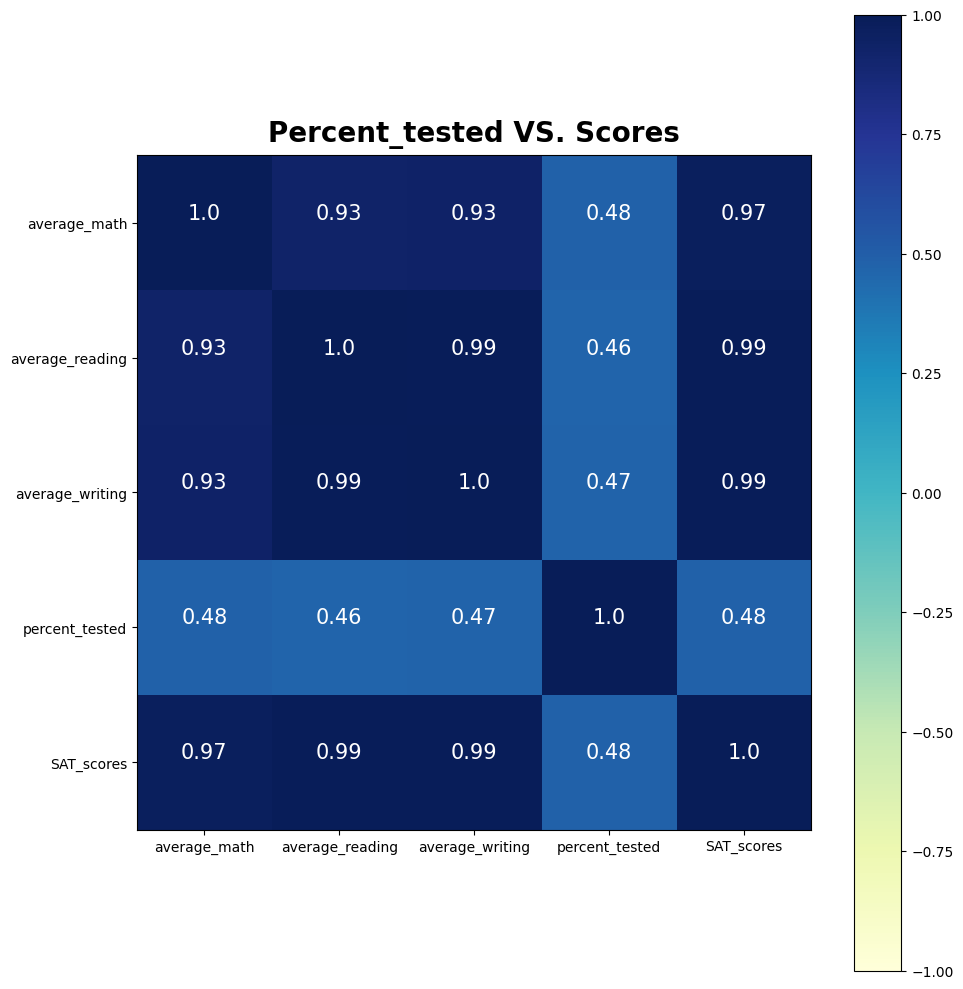

In [14]:
matrix = schools[['average_math', 'average_reading', 'average_writing', 'percent_tested', 'SAT_scores']]
# filtering out the column with nummerical values
matrix_corr = matrix.corr() # to check if the columns have relationships
matrix_corr
plt.subplots(figsize = (10, 10))
plt.imshow(matrix_corr, cmap = 'YlGnBu', vmin = -1.0, vmax = 1.0) # visualizing the result
plt.colorbar()
plt.xticks(range(len(matrix_corr.columns)), matrix_corr.columns )
plt.yticks(range(len(matrix_corr.index)), matrix_corr.index)

for i in range(len(matrix_corr.columns)):
     for j in range(len(matrix_corr.index)):
          plt.text(i, j, round(matrix_corr.iloc[i, j], 2), fontsize = 15, color = 'w', va = 'bottom', ha = 'center')
plt.title("Percent_tested VS. Scores", fontsize = 20, pad = 10, fontweight = 'bold')
plt.tight_layout()
plt.savefig("Percent_tested VS. Scores.png", dpi = 300)